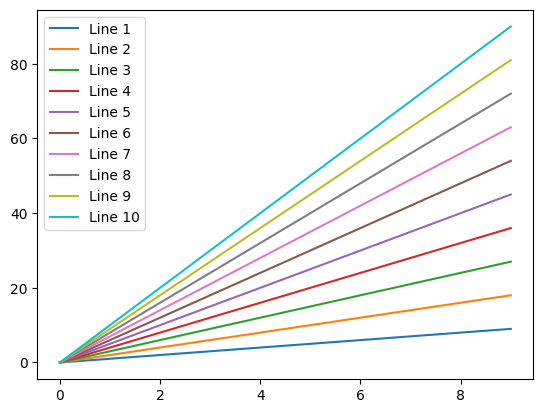

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define your custom color cycle
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Update the Matplotlib color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=custom_colors)

# Example plot
x = range(10)
for i in range(10):
    plt.plot(x, [xi * (i+1) for xi in x], label=f'Line {i+1}')
plt.legend()
plt.show()



In [13]:
import seaborn as sns

sns.set_theme(
    style="whitegrid",  # Choose from: darkgrid, whitegrid, dark, white, ticks
    rc={
        "axes.titlesize": 18,
        "axes.labelsize": 14,
        "lines.linewidth": 2,
        "lines.markersize": 6,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "grid.color": "black",
        "grid.linestyle": "--",
        "grid.linewidth": 0.5
    }
)


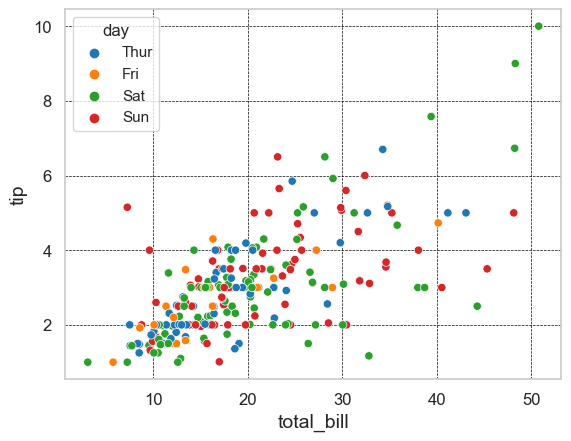

In [17]:

# Define your custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Set the custom color palette
sns.set_palette(custom_palette)

# Example plot
tips = sns.load_dataset("tips")
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)
plt.show()


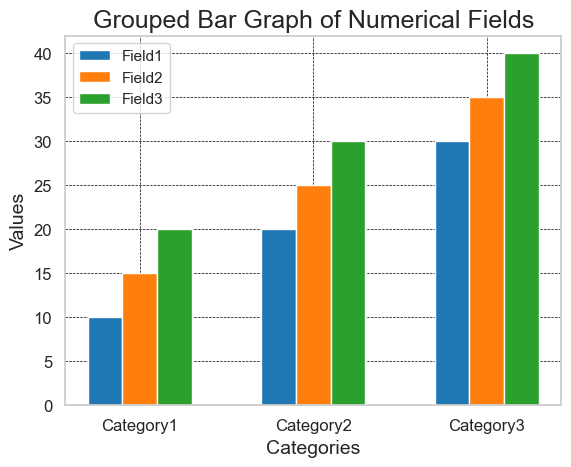

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['Category1', 'Category2', 'Category3']
field1 = [10, 20, 30]
field2 = [15, 25, 35]
field3 = [20, 30, 40]

# Number of categories and fields
n_categories = len(categories)
n_fields = 3

# Set the positions of the bars
ind = np.arange(n_categories)  # the x locations for the groups
width = 0.2  # the width of the bars

# Create the figure and axis
fig, ax = plt.subplots()

# Plotting the bars
bar1 = ax.bar(ind - width, field1, width, label='Field1')
bar2 = ax.bar(ind, field2, width, label='Field2')
bar3 = ax.bar(ind + width, field3, width, label='Field3')

# Adding labels, title and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Graph of Numerical Fields')
ax.set_xticks(ind)
ax.set_xticklabels(categories)
ax.legend()

# Display the graph
plt.show()


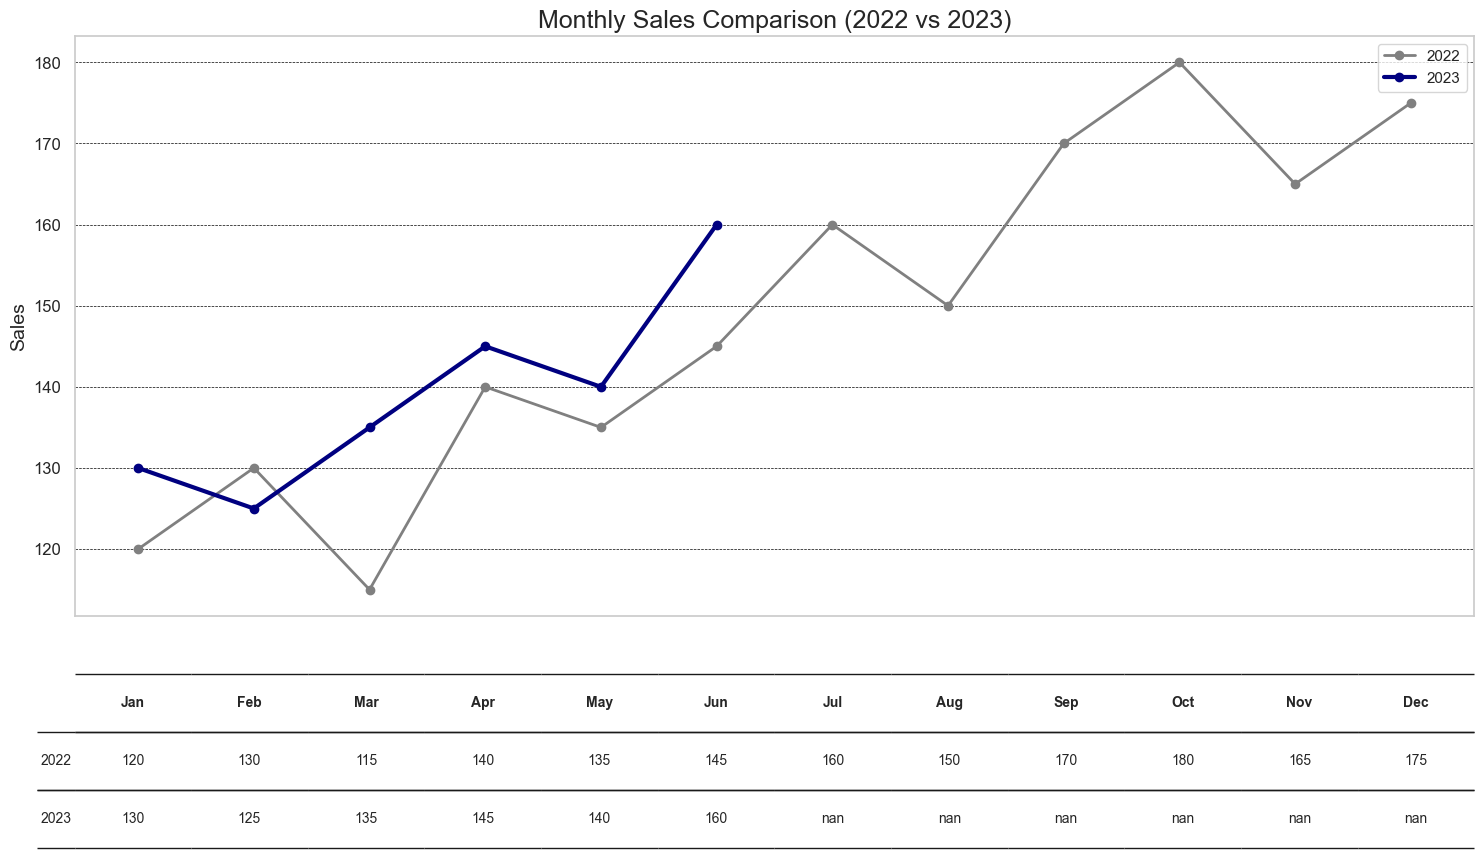

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_2022 = [120, 130, 115, 140, 135, 145, 160, 150, 170, 180, 165, 175]
sales_2023 = [130, 125, 135, 145, 140, 160]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Adjust months and sales data for 2023
months_2023 = months[:len(sales_2023)]

# Plotting the lines
ax.plot(months, sales_2022, label='2022', marker='o', c='grey', linewidth=2)
ax.plot(months_2023, sales_2023, label='2023', marker='o', c='navy', linewidth=3)

# Adding labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales Comparison (2022 vs 2023)')
ax.legend()


# Add the table
row_labels = ['2022', '2023']
table_data = [sales_2022, sales_2023 + [np.nan]*(len(months)-len(sales_2023))]

# Create the table and add it to the plot
the_table = plt.table(cellText=table_data,
                      rowLabels=row_labels,
                      colLabels=months,
                      loc='bottom',
                      cellLoc='center',
                      rowLoc='center',
                      bbox=[0, -0.4, 1, 0.3],
                      edges='horizontal')  # Adjust the bbox to place the table correctly

# Customize the table headers and borders
for key, cell in the_table.get_celld().items():
    cell.set_fontsize(10)
    if key[0] == 0:  # Header cells
        cell.set_text_props(weight='bold')

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.2, bottom=0.3)
plt.gca().axes.get_xaxis().set_visible(False)

# Display the graph and table
plt.show()


NameError: name 'df_final' is not defined

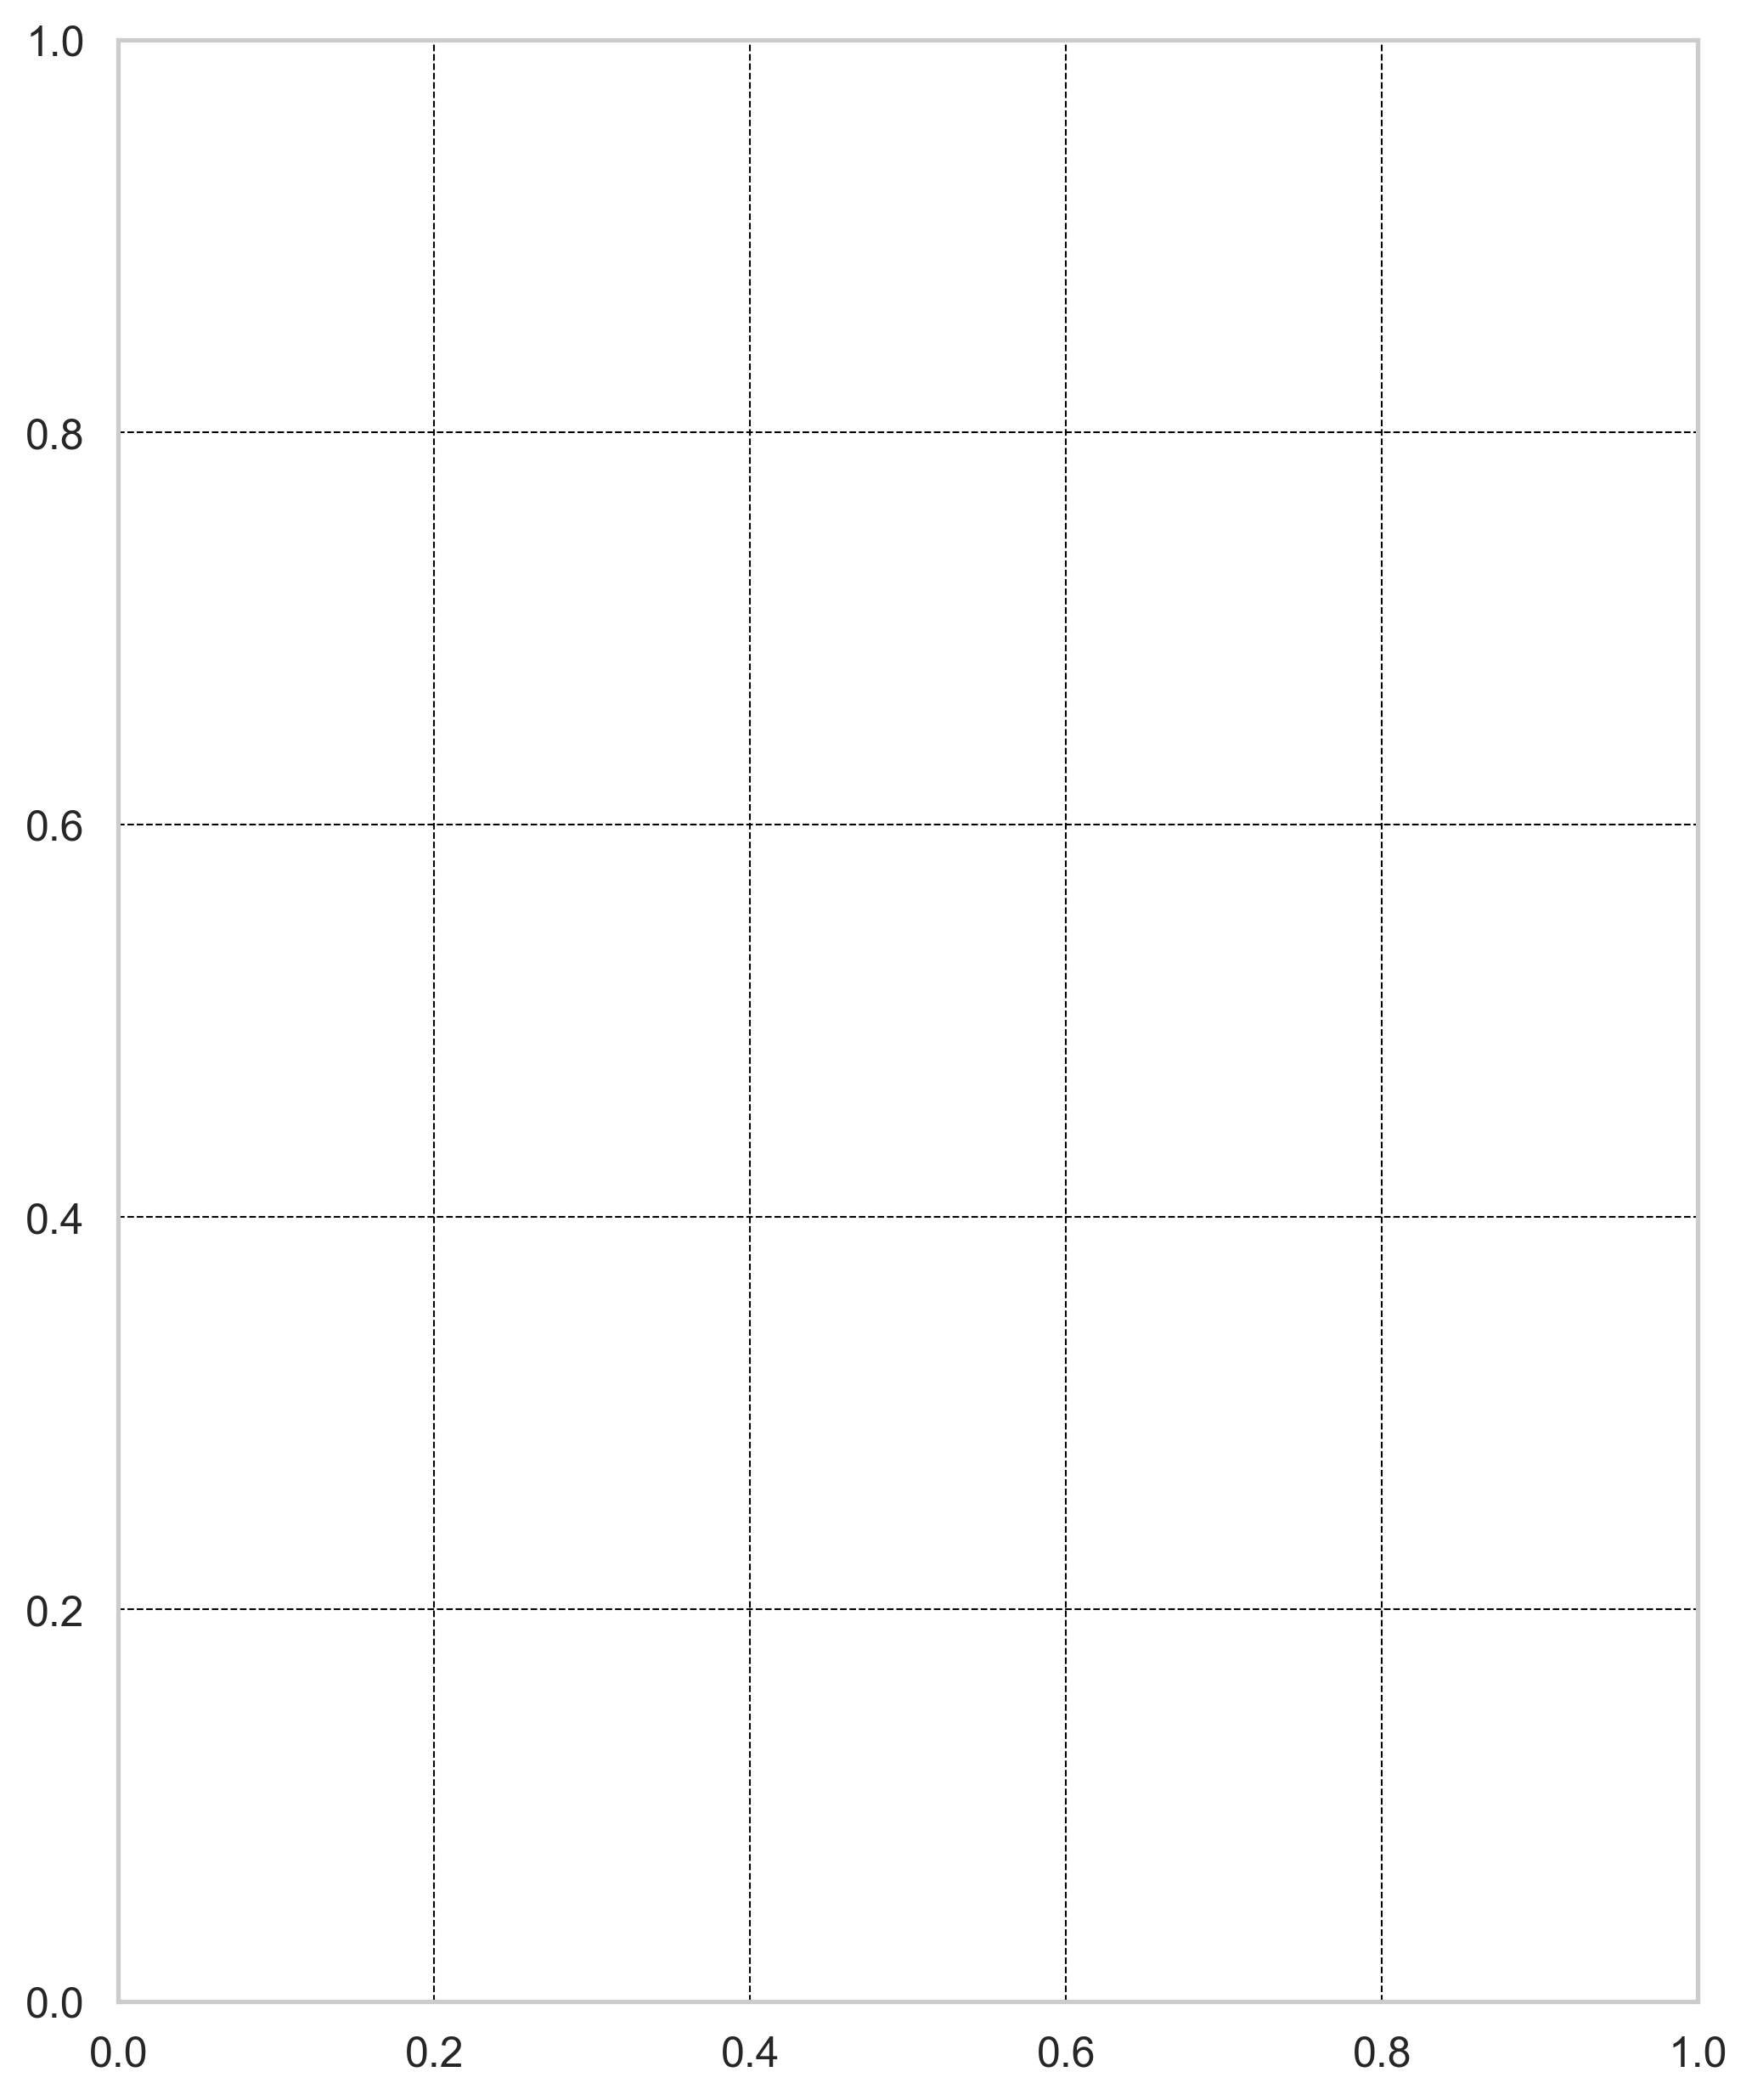

In [53]:
# This is random data.
data = {
    'teams': ['Real Madrid', 'Barcelona', 'Villarreal', 'Sevilla'],
    'goals_scored': [23, 15, 28, 12]
}



fig = plt.figure(figsize=(8,10), dpi=300)
ax = plt.subplot()

ncols = 6
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'Min', 'MP', 'Starts_InSquad']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'Min':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['Nation'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    minutes_battery(df_final['Min'].iloc[x], bar_ax)

# -- Add column names
column_names = ['Player', 'Position', '% of Min.\nPlayed', 'Matches\nPlayed', 'Starts /\nIn Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.fill_between(
    x=[0,2],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=0.5,
    ec='None'
)

ax.set_axis_off()
# -- Final details
logo_ax = fig.add_axes(
    [0.825, 0.89, .05, .05]
)
ax_logo(8633, logo_ax)
fig.text(
    x=0.15, y=.91,
    s='Real Madrid 2021/2022 Squad Playing Time',
    ha='left',
    va='bottom',
    weight='bold',
    size=12
)
plt.savefig(
    'figures/final_table.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

# Smooth Line Graph

In [28]:
plt.style.use('seaborn-v0_8')

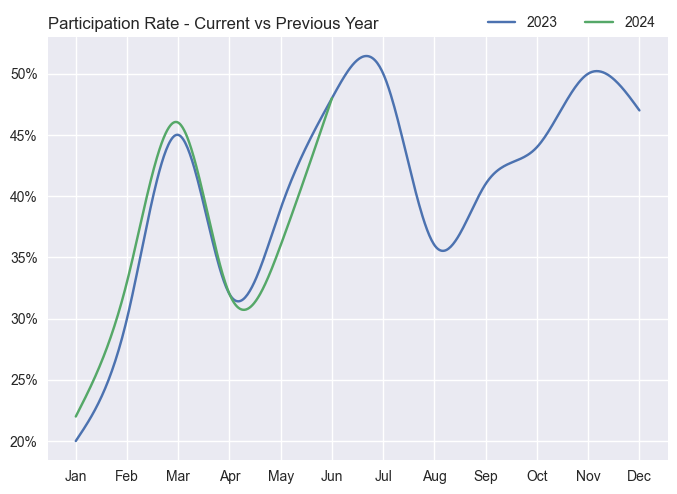

In [66]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Dataset 1
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y1 = np.array([20, 30, 45, 32, 39, 48, 50, 36,41, 44,50,47])

# Dataset 2 with different length
y2 = np.array([22, 33, 46, 32, 36, 48])
x2 = np.arange(1,len(y2)+1)
l, r = [(2, 0.0)], [(2, 0.0)]

# Interpolation for dataset 1
X_Y_Spline1 = make_interp_spline(x1, y1, bc_type=(l, r))
X1_ = np.linspace(x1.min(), x1.max(), 500)
Y1_ = X_Y_Spline1(X1_)

# Interpolation for dataset 2
X_Y_Spline2 = make_interp_spline(x2, y2, bc_type=(l, r))
X2_ = np.linspace(x2.min(), x2.max(), 500)
Y2_ = X_Y_Spline2(X2_)

# Plotting the Graph
plt.plot(X1_, Y1_, label='2023')
plt.plot(X2_, Y2_, label='2024')
plt.title("Participation Rate - Current vs Previous Year", loc='left')

# Adjust x-axis labels
plt.xticks(ticks=np.arange(1, len(months) + 1), labels=months)
# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))

# Adding legend
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.08), ncol=2)


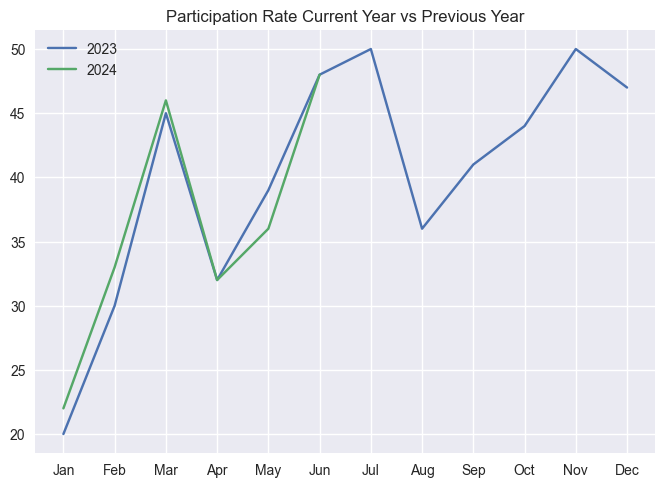

In [30]:
plt.plot(x1, y1, label='2023')
plt.plot(x2, y2, label='2024')
plt.title("Participation Rate Current Year vs Previous Year")

# Adjust x-axis labels
plt.xticks(ticks=np.arange(1, len(months) + 1), labels=months)

# Adding legend
plt.legend()


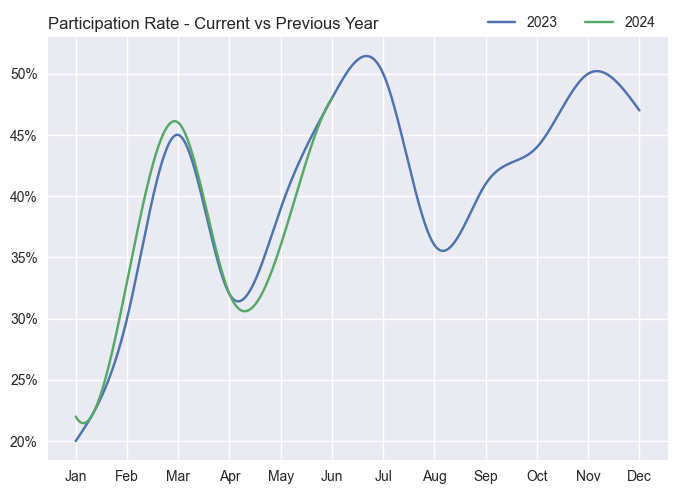

In [72]:
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Dataset 1
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
y1 = np.array([20, 30, 45, 32, 39, 48, 50, 36,41, 44,50,47])

# Dataset 2 with different length
y2 = np.array([22, 33, 46, 32, 36, 48])
x2 = np.arange(1,len(y2)+1)
l, r = [(2, 0.0)], [(2, 0.0)]

# Interpolation for dataset 1
X_ = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=3)
Y_ = spl(X_)

# Interpolation for dataset 2
X2_ = np.linspace(x2.min(), x2.max(), 500)
spl2 = make_interp_spline(x2, y2, k=3)
Y2_ = spl2(X2_)

# Plotting the Graph
plt.plot(X1_, Y1_, label='2023')
plt.plot(X2_, Y2_, label='2024')
plt.title("Participation Rate - Current vs Previous Year", loc='left')

# Adjust x-axis labels
plt.xticks(ticks=np.arange(1, len(months) + 1), labels=months)
# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))

# Adding legend
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.08), ncol=2)
